In [1]:
using DiffGrating1D
using Plots; gr()
using LinearAlgebra
using JLD
using Interpolations

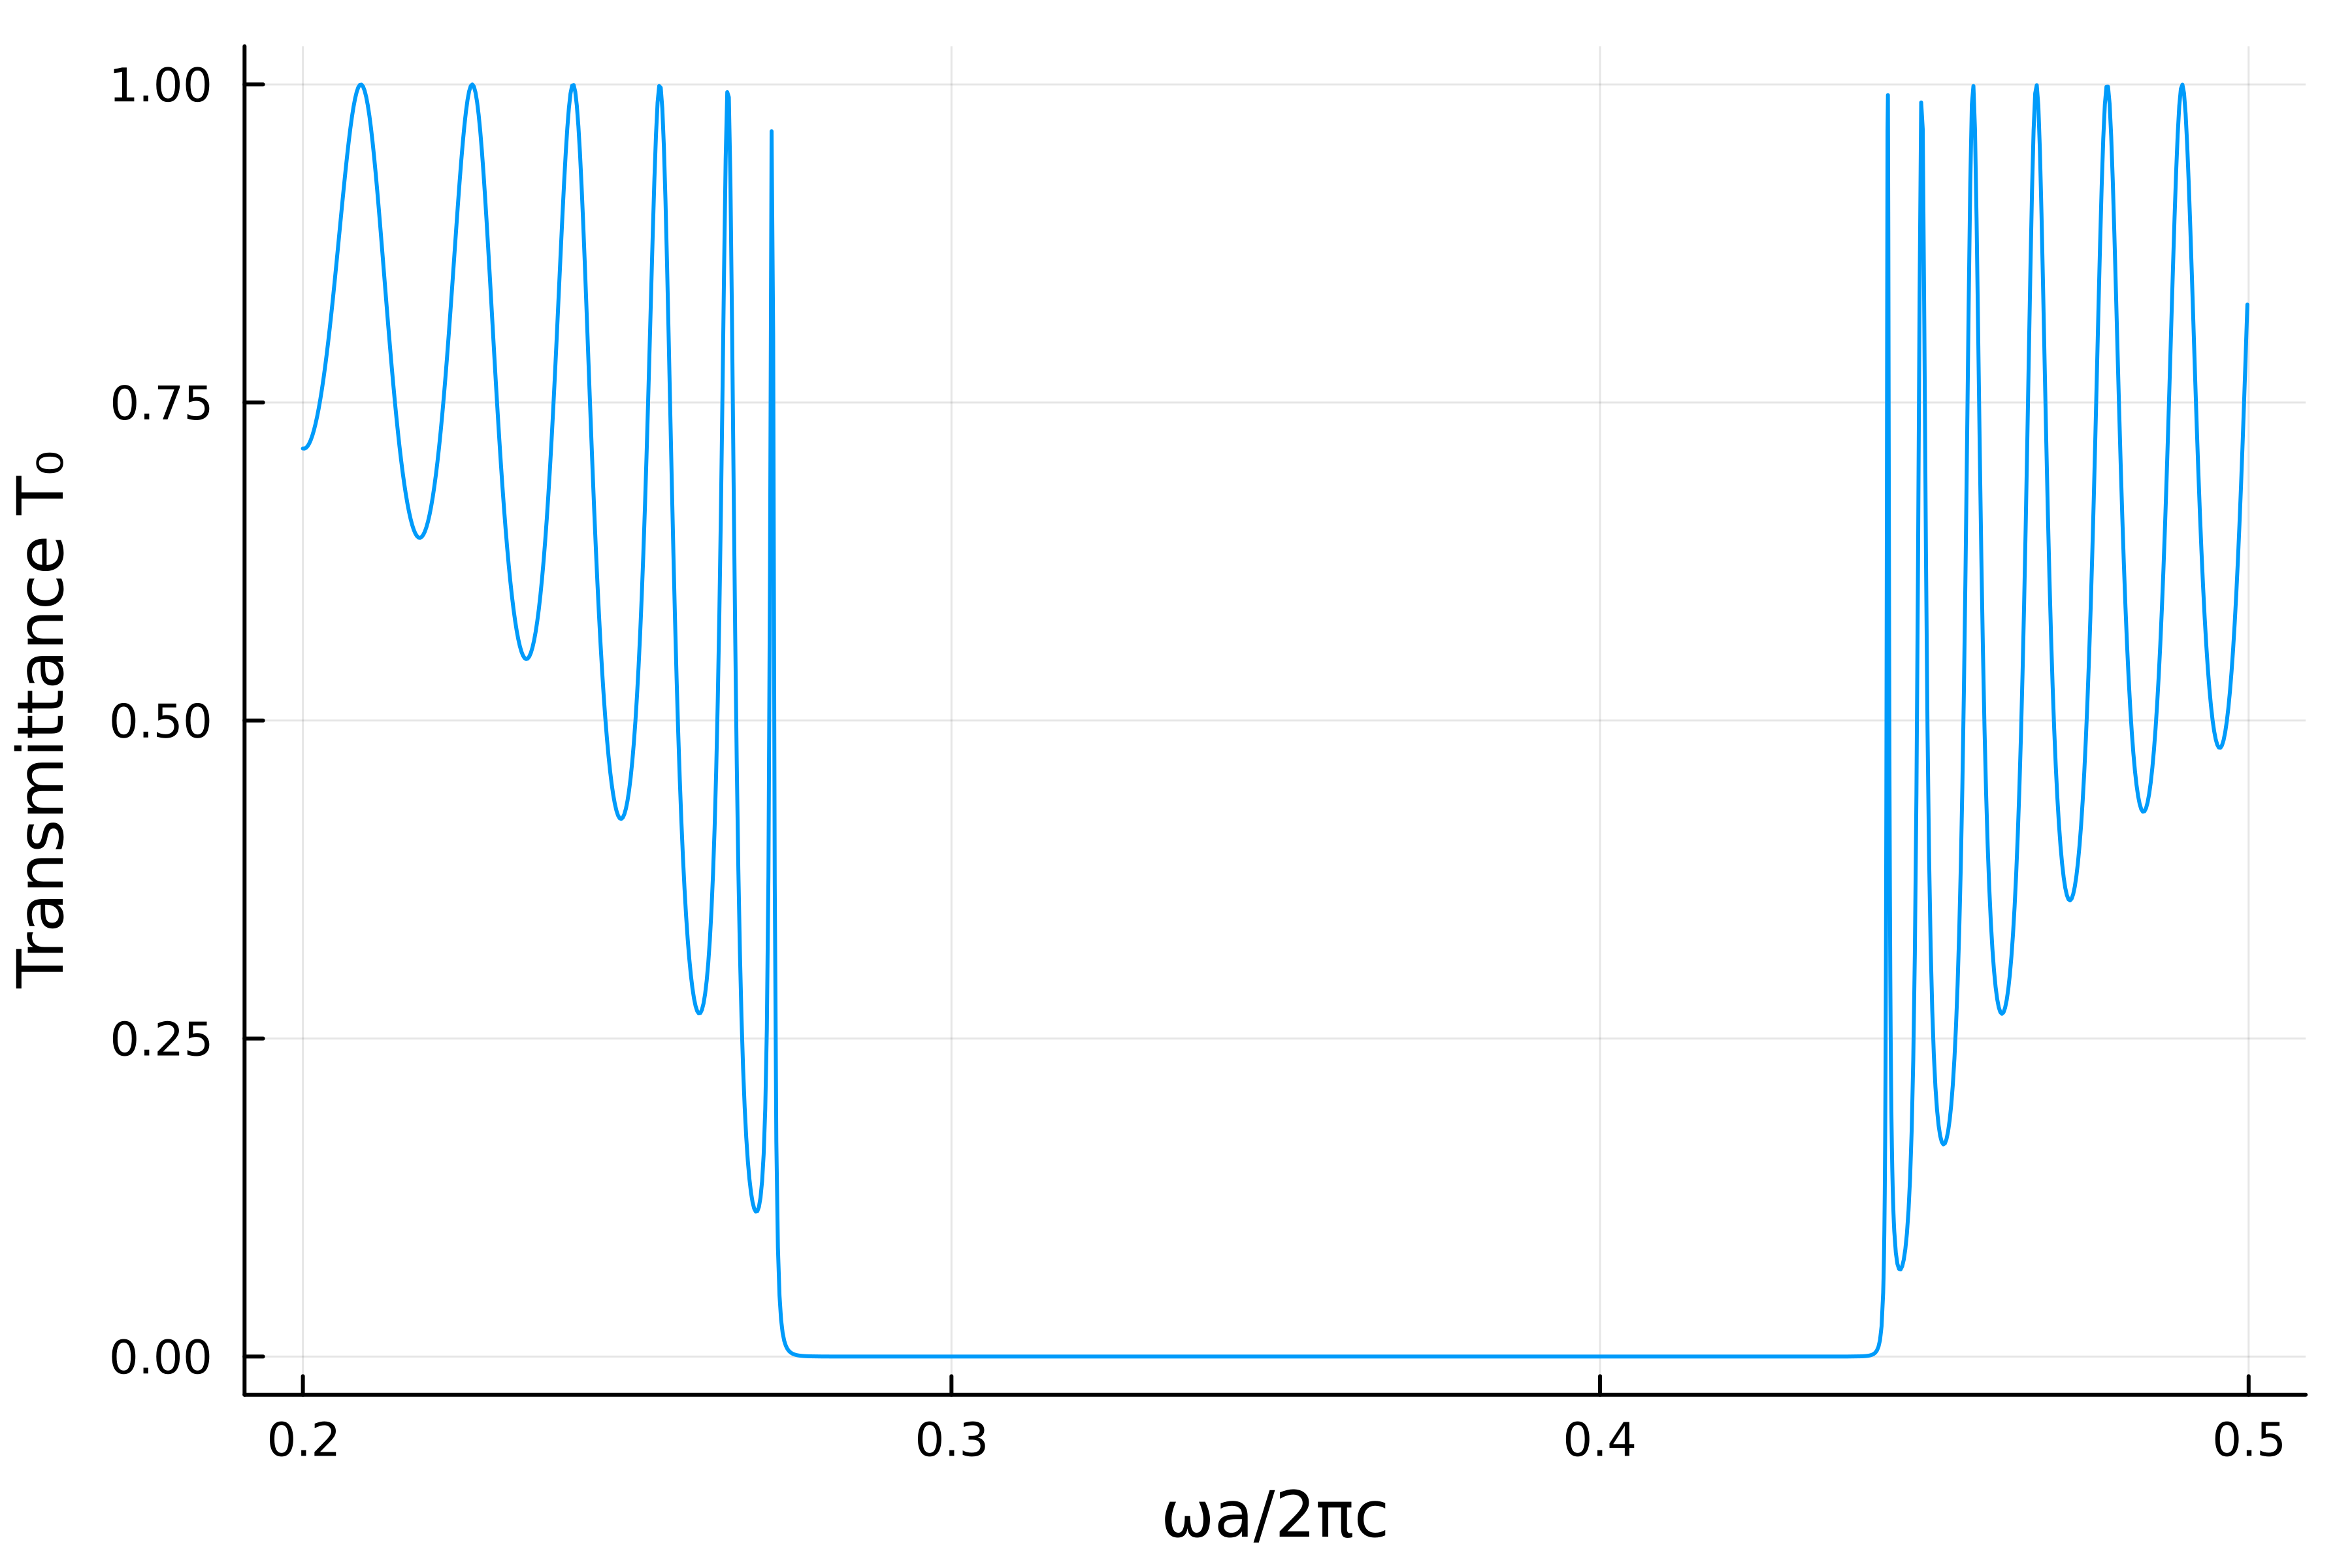

In [12]:
## Multiple wavelengths
data_file = "data_multiple_wl.jld"
@load data_file wLlist tlist
perm = sortperm(wLlist)
wLlist_plot = wLlist[perm]
t0list_plot = tlist[perm]
# construct interpolant
itp = interpolate((wLlist_plot,), real.(t0list_plot), Gridded(Linear()))
fig = plot(wLlist_plot,itp.(wLlist_plot),xlabel="ωa/2πc",ylabel="Transmittance T₀",dpi=600,legend=false)
savefig("ex5_multiple_wl.pdf")
plot(fig)

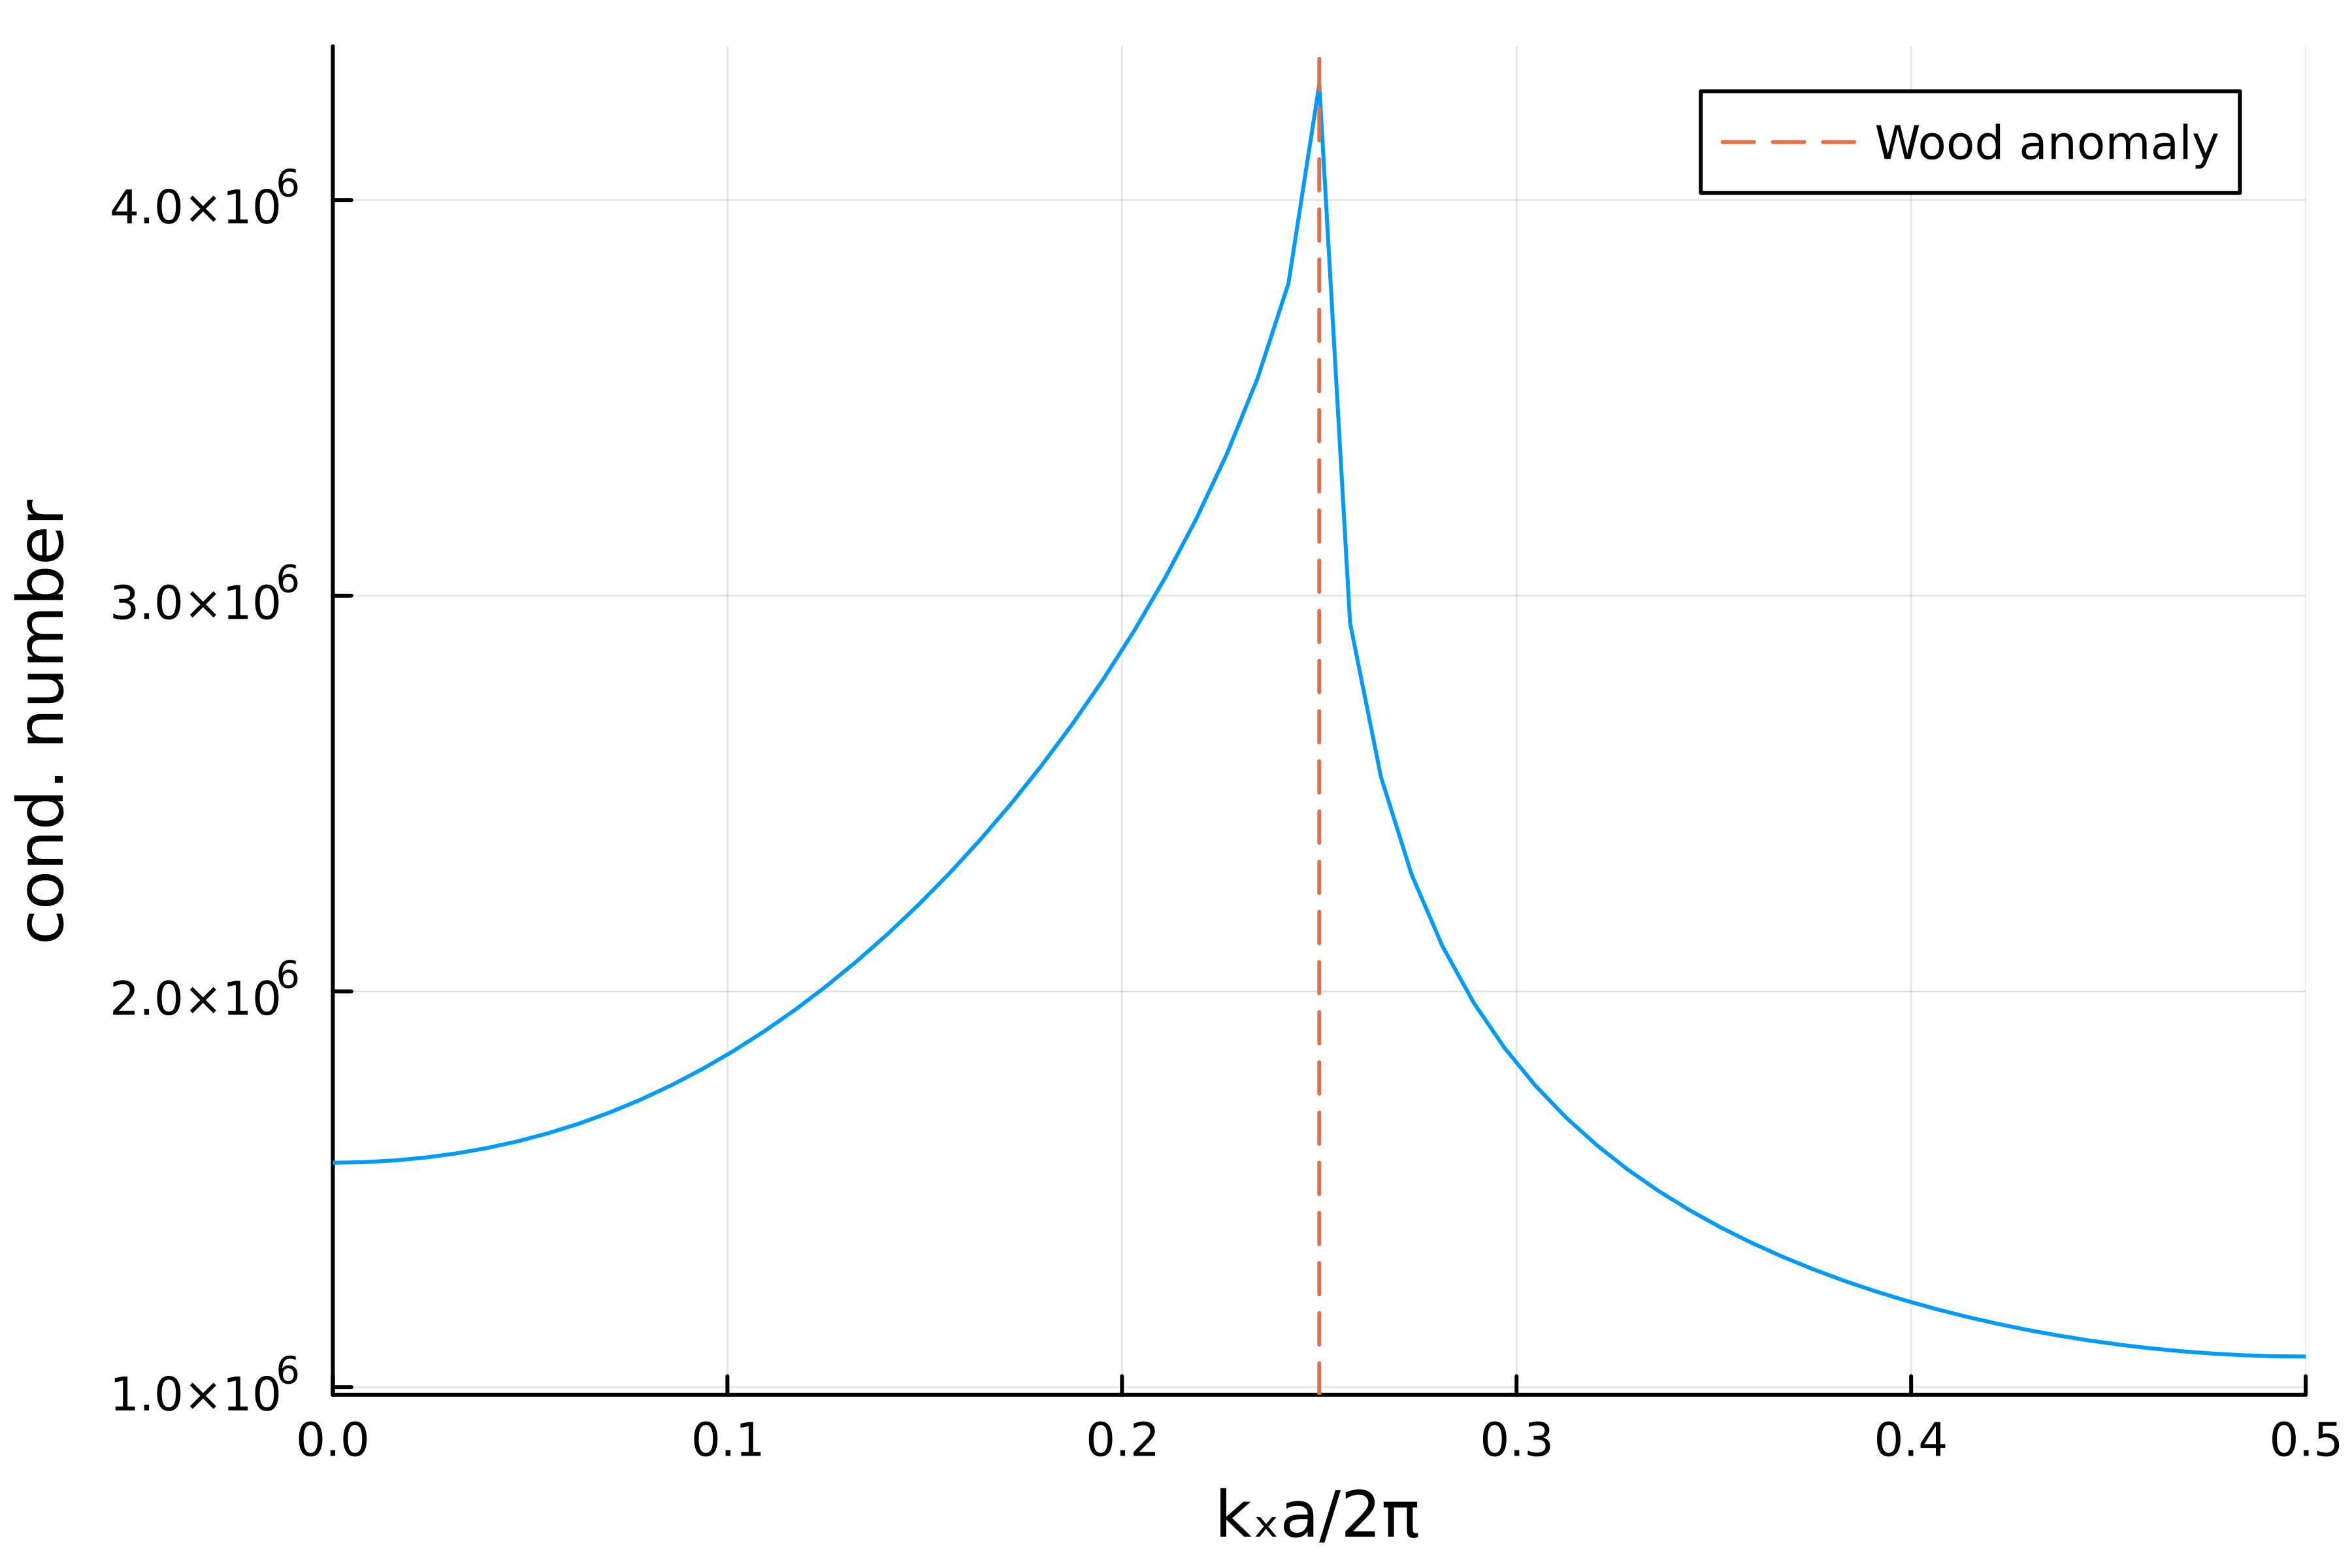

In [13]:
data_file = "data_cond_number.jld"
@load data_file data_file αlist clist
αwlist = [0.25]
perm = sortperm(αlist)
αlist_plot = αlist[perm]
clist_plot = clist[perm]
# construct interpolant
itp = interpolate((αlist_plot,), real.(clist_plot), Gridded(Linear()))
fig = plot(αlist_plot,itp.(αlist_plot),xlabel="kₓa/2π",ylabel="cond. number",label="",dpi=600)
vline!(αwlist,label="Wood anomaly",legend=true,ls=:dash) 
xlims!(0,0.5)
savefig("ex5_cond_number.pdf")
plot(fig)

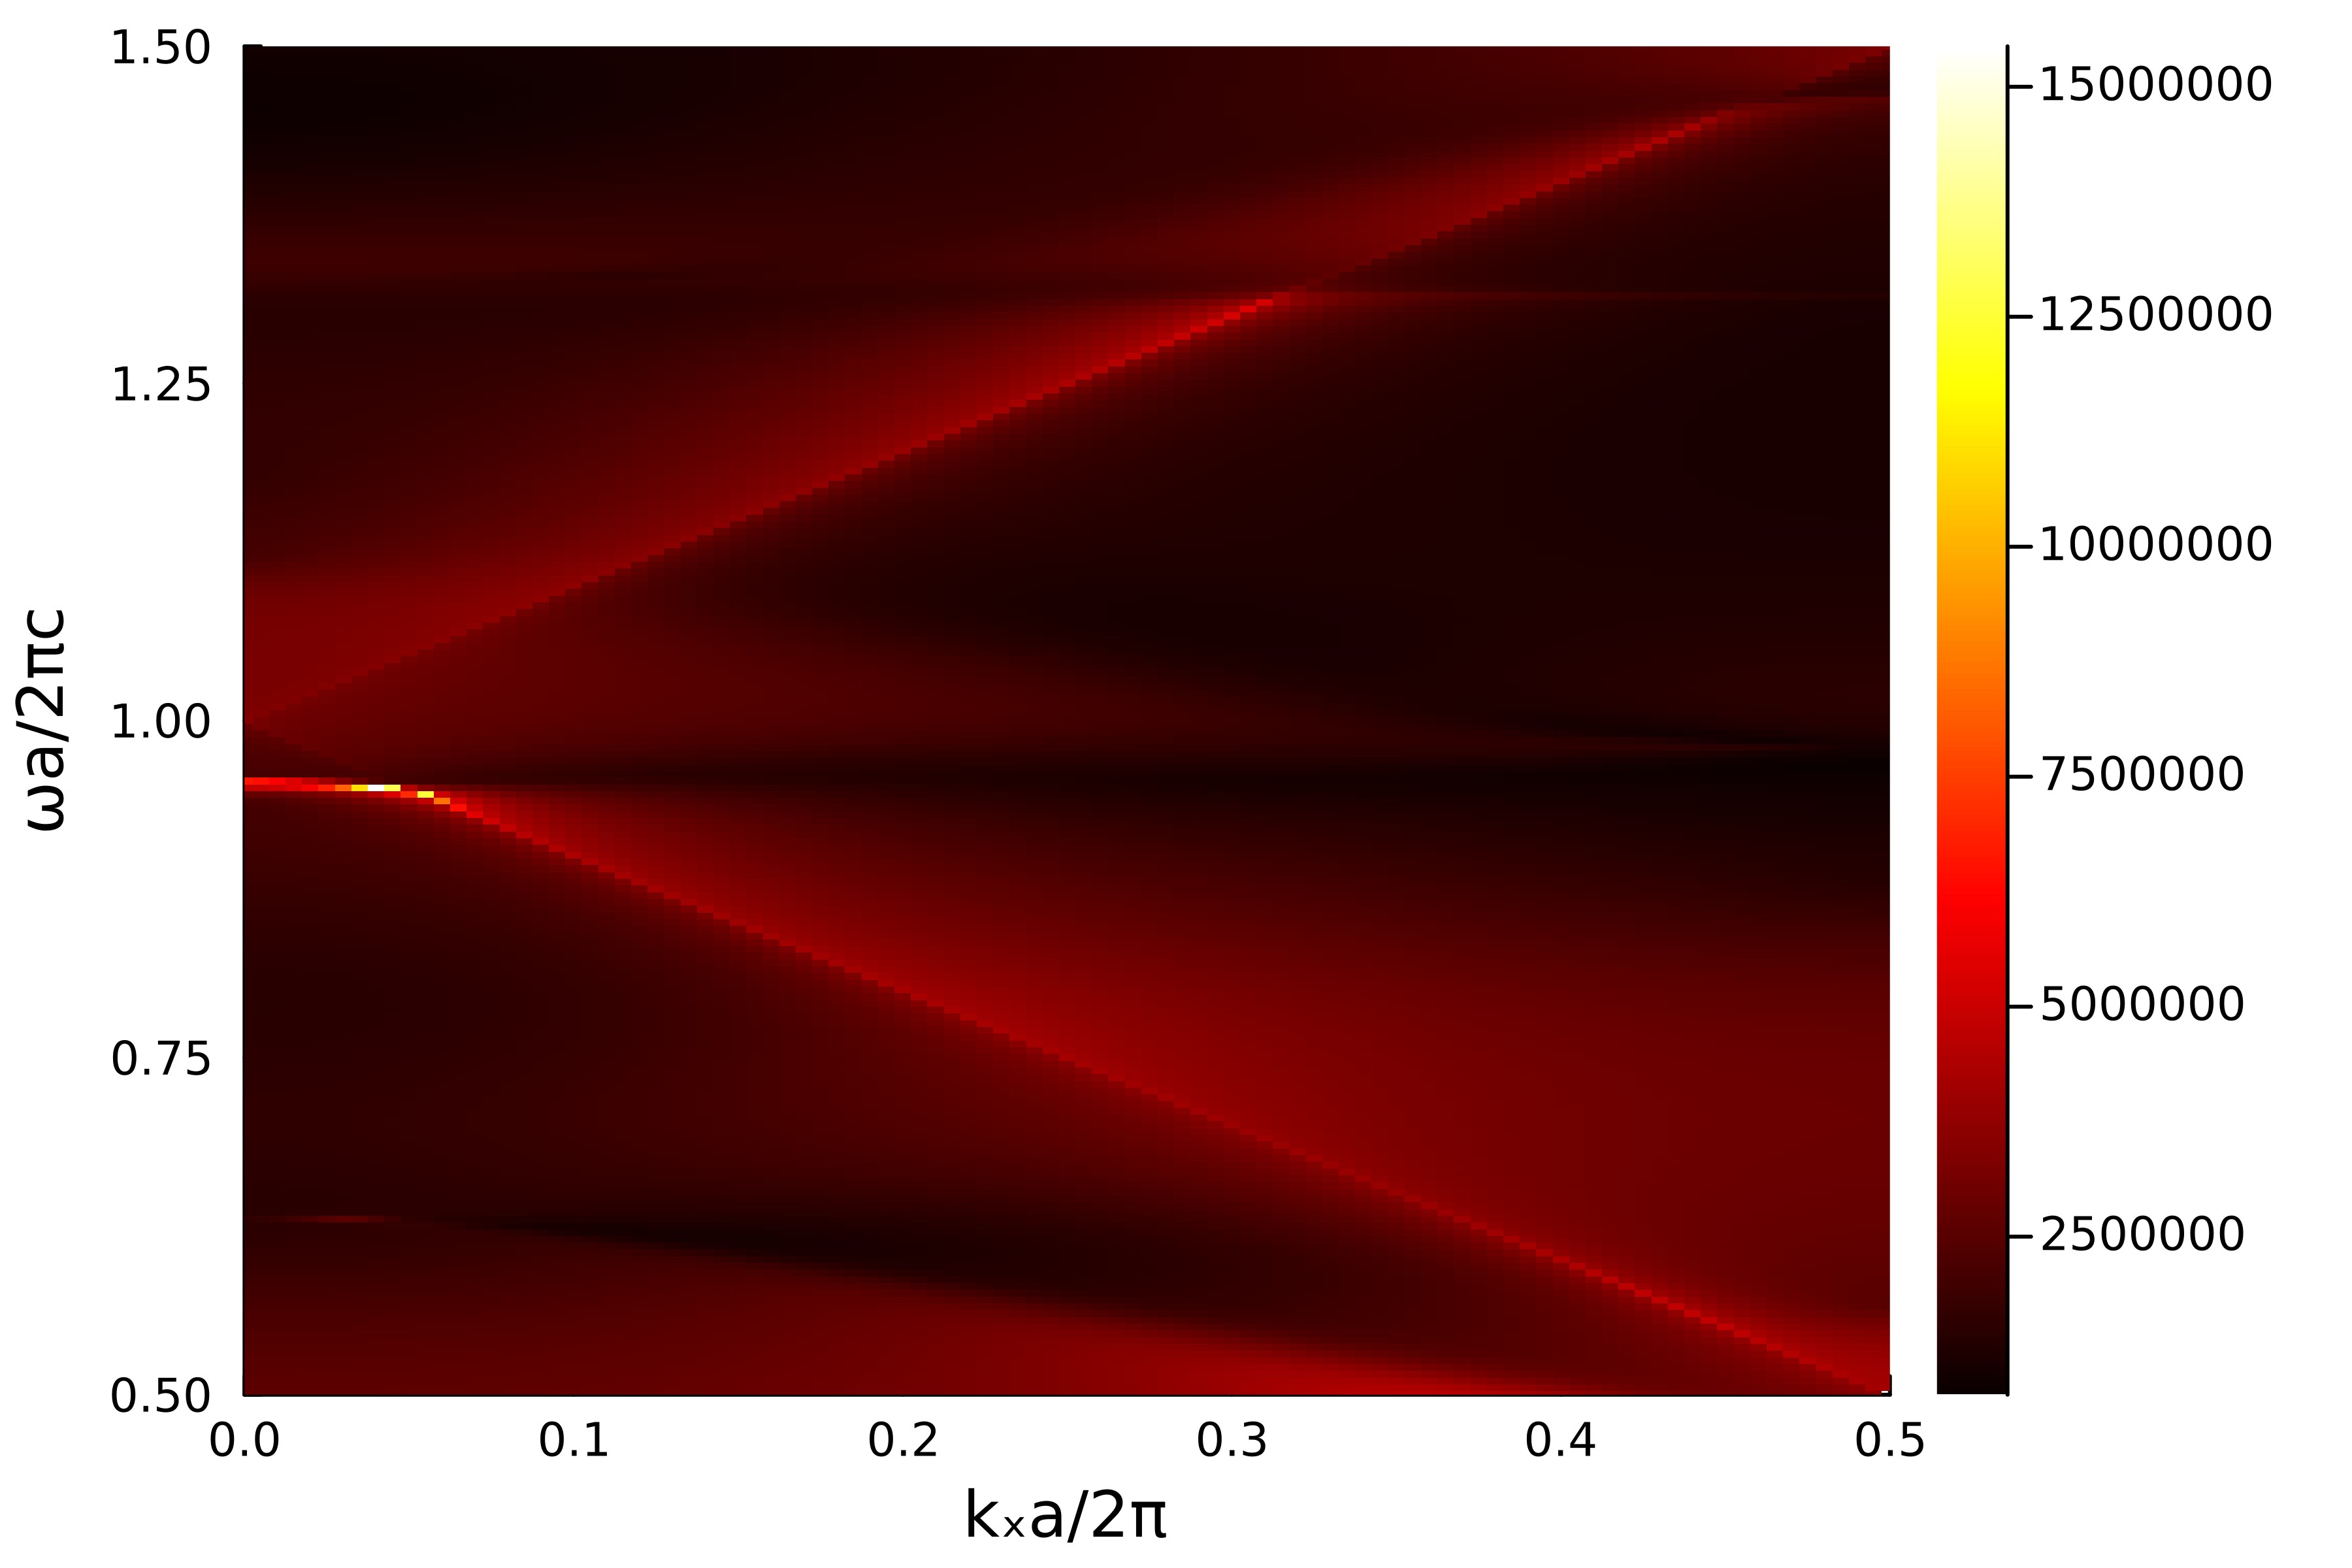

In [28]:
# Wood anomaly multiple wavelengths
using Plots.PlotMeasures
data_file = "data_cond_number_w_kx.jld"
@load data_file αlist wLlist clist
fig = heatmap(αlist,wLlist,(transpose(clist)),grid=false,xlabel="kₓa/2π",ylabel="ωa/2πc",c=:hot,dpi=600,
              right_margin=50px)#zformatter = x->string(Int(x/1e6),"*pow10"))
xlims!(0.0,0.5)
ylims!(0.5,1.5)


savefig("ex5_cond_number_w_kx.pdf")
plot(fig)